In [1]:
#Importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from bs4 import BeautifulSoup as bs

In [3]:
Customer_Demographics = pd.read_csv(r"C:\Users\Tommy O'Gorman\OneDrive\Desktop\Data Analytics Course\Introductory Data Analytics Project\Predicting Coupon Redemption_Feature Selection\customer_demographics.csv")

In [4]:
Customer_Transaction_Data = pd.read_csv(r"C:\Users\Tommy O'Gorman\OneDrive\Desktop\Data Analytics Course\Introductory Data Analytics Project\Predicting Coupon Redemption_Feature Selection\customer_transaction_data.csv")

In [5]:
Item_Data = pd.read_csv(r"C:\Users\Tommy O'Gorman\OneDrive\Desktop\Data Analytics Course\Introductory Data Analytics Project\Predicting Coupon Redemption_Feature Selection\item_data.csv")

In [6]:
#Preparation

In [7]:
#Create pandas Dataframe:

In [8]:
Customer_Demographics_DF = pd.DataFrame(Customer_Demographics)

In [9]:
Customer_Demographics_DF.shape

(760, 7)

In [10]:
Customer_Transaction_Data_DF = pd.DataFrame(Customer_Transaction_Data)

In [11]:
Customer_Transaction_Data_DF.shape

(1324566, 7)

In [12]:
Item_Data_DF = pd.DataFrame(Item_Data)

In [13]:
Item_Data_DF.shape

(74066, 4)

In [14]:
Customer_Demographics_DF.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [15]:
Item_Data_DF.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [16]:
#Sorting

In [17]:
Customer_Demographics_DF = Customer_Demographics_DF.sort_values("age_range")

In [18]:
Customer_Transaction_Data_DF = Customer_Transaction_Data_DF.sort_values("coupon_discount")

In [19]:
#Indexing

In [20]:
Customer_Demographics_DF = Customer_Demographics_DF[['customer_id', 'age_range', 'marital_status', 'income_bracket', 'family_size', 'no_of_children']]

In [21]:
Customer_Demographics_DF

,customer_id,age_range,marital_status,income_bracket,family_size,no_of_children
609,1264,18-25,NaN,3,1,NaN
369,750,18-25,Married,2,2,NaN
535,1116,18-25,NaN,4,1,NaN
539,1121,18-25,Married,5,3,1
544,1131,18-25,Single,1,5+,3+
...,...,...,...,...,...,...
257,516,70+,NaN,4,2,NaN
599,1249,70+,NaN,2,1,NaN
116,232,70+,NaN,5,1,NaN
542,1129,70+,NaN,9,2,NaN


In [22]:
Customer_Transaction_Data_DF.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
658929,2012-11-04,781,61002,8,2048.86,-227.97,-1992.23
1096649,2013-04-10,1184,70834,24,2137.20,-1872.19,-1211.08
329465,2012-07-08,919,63226,1,1068.24,0.00,-1068.24
1239461,2013-06-01,1469,9106,1,747.66,0.00,-747.66
385273,2012-07-28,1068,28633,20,626.91,-505.80,-712.40


In [23]:
Customer_Transaction_Data_DF = Customer_Transaction_Data_DF[['customer_id', 'item_id', 'quantity', 'selling_price', 'coupon_discount', 'other_discount', 'date']]

In [24]:
Item_Data_DF = Item_Data_DF[['item_id', 'category', 'brand_type', 'brand']]

In [25]:
Item_Data_DF.head()

,item_id,category,brand_type,brand
0,1,Grocery,Established,1
1,2,Miscellaneous,Established,1
2,3,Bakery,Local,56
3,4,Grocery,Local,56
4,5,Grocery,Local,56


In [26]:
#Indexing

In [27]:
Customer_Demographics_DF.set_index('customer_id', inplace=True)

In [28]:
Customer_Demographics_DF.head()

,age_range,marital_status,income_bracket,family_size,no_of_children
customer_id,,,,,
1264,18-25,NaN,3,1,NaN
750,18-25,Married,2,2,NaN
1116,18-25,NaN,4,1,NaN
1121,18-25,Married,5,3,1
1131,18-25,Single,1,5+,3+


In [29]:
Customer_Transaction_Data_DF.set_index('customer_id', inplace=True)

In [30]:
Customer_Transaction_Data_DF.head()

,item_id,quantity,selling_price,coupon_discount,other_discount,date
customer_id,,,,,,
781,61002,8,2048.86,-1992.23,-227.97,2012-11-04
1184,70834,24,2137.20,-1211.08,-1872.19,2013-04-10
919,63226,1,1068.24,-1068.24,0.00,2012-07-08
1469,9106,1,747.66,-747.66,0.00,2013-06-01
1068,28633,20,626.91,-712.40,-505.80,2012-07-28


In [31]:
Item_Data_DF.set_index('item_id', inplace=True)

In [32]:
Item_Data_DF.head()

,category,brand_type,brand
item_id,,,
1,Grocery,Established,1
2,Miscellaneous,Established,1
3,Bakery,Local,56
4,Grocery,Local,56
5,Grocery,Local,56


In [33]:
Customer_Demographics_DF = Customer_Demographics_DF.reset_index()

In [34]:
Customer_Transaction_Data_DF = Customer_Transaction_Data_DF.reset_index()

In [35]:
Item_Data_DF = Item_Data_DF.reset_index()

In [36]:
# Drop Duplicates

In [37]:
Customer_Demographics_DF = Customer_Demographics_DF.drop_duplicates()

In [38]:
len(Customer_Transaction_Data_DF)

1324566

In [39]:
Customer_Transaction_Data_DF = Customer_Transaction_Data_DF.drop_duplicates()

In [40]:
len(Customer_Transaction_Data_DF)

1321650

In [41]:
Item_Data_DF = Item_Data_DF = Item_Data_DF.drop_duplicates()

In [42]:
Customer_Demographics_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   income_bracket  760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
dtypes: int64(2), object(4)
memory usage: 41.6+ KB


In [43]:
#Merge Dataframes

In [44]:
len(Customer_Transaction_Data_DF)

1321650

In [45]:
len(Customer_Demographics)

760

In [46]:
len(Item_Data_DF)

74066

In [47]:
# I am going to join Customer_Transaction_Data with Customer_Demographics first using 'customer id' as the key. Customer_id 
is a primary key in the customer_demographics dataframe and a foreign key in the Customer_Transaction_Data so this is a 
many to one join and will not result in exponential growth of outcomes. 
I am then going to join this new dataframe with the Item_ID dataframe using item_id as the key. Item_id is a primary key in 
the newly merged dataframe and a foreign key in the customer_transaction_data. Again this is a many to one join and should 
not result in the exponential result of outcomes.

SyntaxError: invalid syntax (Temp/ipykernel_3400/3835712088.py, line 2)

In [48]:
Transaction_Demographics_DF = pd.merge(Customer_Transaction_Data_DF, Customer_Demographics, on = 'customer_id', how='outer')

In [49]:
Transaction_Demographics_DF

,customer_id,item_id,quantity,selling_price,coupon_discount,other_discount,date,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,781,61002,8,2048.86,-1992.23,-227.97,2012-11-04,46-55,NaN,0.0,1,NaN,7.0
1,781,12769,2,868.42,-604.83,-56.99,2012-11-24,46-55,NaN,0.0,1,NaN,7.0
2,781,70434,1,416.40,-462.70,-46.31,2013-01-02,46-55,NaN,0.0,1,NaN,7.0
3,781,6615,1,320.22,-355.84,-35.62,2012-02-06,46-55,NaN,0.0,1,NaN,7.0
4,781,6615,1,320.22,-355.84,-35.62,2012-07-26,46-55,NaN,0.0,1,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321645,975,16639,1,89.05,0.00,-53.07,2012-04-15,NaN,NaN,NaN,NaN,NaN,NaN
1321646,975,15663,2,49.16,0.00,-21.37,2012-04-15,NaN,NaN,NaN,NaN,NaN,NaN
1321647,975,13774,2,71.24,0.00,-63.40,2012-04-15,NaN,NaN,NaN,NaN,NaN,NaN
1321648,975,7580,1,89.05,0.00,-17.45,2012-04-15,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
Retail_Coupon_DF = pd.merge(Transaction_Demographics_DF, Item_Data_DF)

In [51]:
Retail_Coupon_DF

,customer_id,item_id,quantity,selling_price,coupon_discount,other_discount,date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,category,brand_type,brand
0,781,61002,8,2048.86,-1992.23,-227.97,2012-11-04,46-55,NaN,0.0,1,NaN,7.0,Packaged Meat,Local,56
1,781,61002,2,526.46,0.00,-42.74,2013-06-07,46-55,NaN,0.0,1,NaN,7.0,Packaged Meat,Local,56
2,781,61002,1,263.23,0.00,-21.37,2012-06-04,46-55,NaN,0.0,1,NaN,7.0,Packaged Meat,Local,56
3,781,61002,1,263.23,0.00,-21.37,2012-05-10,46-55,NaN,0.0,1,NaN,7.0,Packaged Meat,Local,56
4,781,61002,1,263.23,0.00,-21.37,2012-07-07,46-55,NaN,0.0,1,NaN,7.0,Packaged Meat,Local,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321645,975,45824,1,248.98,0.00,0.00,2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN,"Dairy, Juices & Snacks",Established,1138
1321646,975,9425,1,224.05,0.00,0.00,2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN,"Dairy, Juices & Snacks",Established,2217
1321647,975,11192,1,35.26,0.00,0.00,2012-03-01,NaN,NaN,NaN,NaN,NaN,NaN,Pharmaceutical,Established,1262
1321648,975,46463,1,35.26,0.00,0.00,2012-03-01,NaN,NaN,NaN,NaN,NaN,NaN,Pharmaceutical,Established,1262


In [52]:
#rearranging order of columns

In [53]:
Retail_Coupon_DF = Retail_Coupon_DF[['date', 'age_range', 'family_size', 'marital_status', 'income_bracket', 'no_of_children', 'category', 
                 'brand_type', 'quantity', 'selling_price', 'coupon_discount', 'other_discount', 'customer_id', 'item_id']]

In [54]:
Retail_Coupon_DF.head()

,date,age_range,family_size,marital_status,income_bracket,no_of_children,category,brand_type,quantity,selling_price,coupon_discount,other_discount,customer_id,item_id
0,2012-11-04,46-55,1,NaN,7.0,NaN,Packaged Meat,Local,8,2048.86,-1992.23,-227.97,781,61002
1,2013-06-07,46-55,1,NaN,7.0,NaN,Packaged Meat,Local,2,526.46,0.00,-42.74,781,61002
2,2012-06-04,46-55,1,NaN,7.0,NaN,Packaged Meat,Local,1,263.23,0.00,-21.37,781,61002
3,2012-05-10,46-55,1,NaN,7.0,NaN,Packaged Meat,Local,1,263.23,0.00,-21.37,781,61002
4,2012-07-07,46-55,1,NaN,7.0,NaN,Packaged Meat,Local,1,263.23,0.00,-21.37,781,61002


In [55]:
Retail_Coupon_DF.set_index('date', inplace=True)

In [56]:
Retail_Coupon_DF

,age_range,family_size,marital_status,income_bracket,no_of_children,category,brand_type,quantity,selling_price,coupon_discount,other_discount,customer_id,item_id
date,,,,,,,,,,,,,
2012-11-04,46-55,1,NaN,7.0,NaN,Packaged Meat,Local,8,2048.86,-1992.23,-227.97,781,61002
2013-06-07,46-55,1,NaN,7.0,NaN,Packaged Meat,Local,2,526.46,0.00,-42.74,781,61002
2012-06-04,46-55,1,NaN,7.0,NaN,Packaged Meat,Local,1,263.23,0.00,-21.37,781,61002
2012-05-10,46-55,1,NaN,7.0,NaN,Packaged Meat,Local,1,263.23,0.00,-21.37,781,61002
2012-07-07,46-55,1,NaN,7.0,NaN,Packaged Meat,Local,1,263.23,0.00,-21.37,781,61002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-10,NaN,NaN,NaN,NaN,NaN,"Dairy, Juices & Snacks",Established,1,248.98,0.00,0.00,975,45824
2012-01-10,NaN,NaN,NaN,NaN,NaN,"Dairy, Juices & Snacks",Established,1,224.05,0.00,0.00,975,9425
2012-03-01,NaN,NaN,NaN,NaN,NaN,Pharmaceutical,Established,1,35.26,0.00,0.00,975,11192


In [57]:
Retail_Coupon_DF = Retail_Coupon_DF.sort_values(by='selling_price')

In [58]:
Retail_Coupon_DF.head()

,age_range,family_size,marital_status,income_bracket,no_of_children,category,brand_type,quantity,selling_price,coupon_discount,other_discount,customer_id,item_id
date,,,,,,,,,,,,,
2013-01-04,46-55,2,Married,5.0,NaN,Natural Products,Established,1,0.36,0.0,0.0,1025,12841
2013-03-16,NaN,NaN,NaN,NaN,NaN,Prepared Food,Established,1,0.36,0.0,0.0,1095,18349
2013-01-18,NaN,NaN,NaN,NaN,NaN,Prepared Food,Local,1,0.36,0.0,0.0,567,34163
2012-09-28,NaN,NaN,NaN,NaN,NaN,Pharmaceutical,Established,1,0.36,0.0,0.0,671,65538
2012-07-15,46-55,1,NaN,4.0,NaN,Pharmaceutical,Established,1,0.36,0.0,0.0,1502,66896


In [59]:
#Grouping

In [60]:
Retail_Coupon_DF.groupby(['category']).mean()

,income_bracket,quantity,selling_price,coupon_discount,other_discount,customer_id,item_id
category,,,,,,,
Alcohol,4.889049,1.099925,369.909217,0.000000,0.000000,749.665175,24068.202834
Bakery,5.217050,1.376621,118.009688,-0.102282,-9.967989,810.211970,30205.625137
"Dairy, Juices & Snacks",5.416226,1.346660,107.141064,-0.228772,-12.713997,835.747639,31320.888035
Flowers & Plants,5.922768,1.184884,302.479588,-0.377776,-2.756596,800.724547,42019.009369
Fuel,4.873411,10857.433295,930.365183,0.000000,-30.619191,800.525087,48638.249637
Garden,5.549153,1.893462,339.850751,0.000000,-30.336344,837.537530,25627.154964
Grocery,4.879822,1.320934,91.529622,-0.576678,-17.464097,800.800480,28509.732179
Meat,4.662137,1.326652,202.544296,-0.065139,-39.844746,799.479674,34855.059612
Miscellaneous,5.569431,6753.473668,679.450621,-0.013956,-21.515069,854.942006,44779.042006


In [61]:
Retail_Coupon_DF.groupby(['category', 'age_range', 'brand_type']).mean()

income_bracket  quantity  \
category         age_range brand_type                              
Alcohol          18-25     Established        4.739726  1.335616   
                 26-35     Established        4.591195  1.031447   
                 36-45     Established        5.342105  1.114035   
                 46-55     Established        4.807229  1.180723   
                 56-70     Established        6.470588  1.058824   
...                                                ...       ...   
Vegetables (cut) 26-35     Established        5.000000  1.000000   
                 36-45     Established        4.473684  1.210526   
                 46-55     Established        6.086957  1.130435   
                 56-70     Established        8.200000  1.200000   
                 70+       Established        3.166667  1.000000   

                                        selling_price  coupon_discount  \
category         age_range brand_type                                    
Alcohol          18-25     Established     603.891712              0.0   
                 26-35     Established     394.151258              0.0   
                 36-45     Established     470.412982              0.0   
                 46-55     Established     327.824618              0.0   
                 56-70     Established     495.137647              0.0   
...                                               ...              ...   
Vegetables (cut) 26-35     Established      70.880000              0.0   
                 36-45     Established      85.054737              0.0   
                 46-55     Established      75.944783              0.0   
                 56-70     Established      85.058000              0.0   
                 70+       Established      66.131667              0.0   

                                        other_discount  customer_id  \
category         age_range brand_type                                 
Alcohol          18-25     Established             0.0  1071.780822   
                 26-35     Established             0.0   760.251572   
                 36-45     Established             0.0   737.850877   
                 46-55     Established             0.0   688.373494   
                 56-70     Established             0.0   555.588235   
...                                                ...          ...   
Vegetables (cut) 26-35     Established             0.0   860.000000   
                 36-45     Established             0.0  1164.421053   
                 46-55     Established             0.0   857.521739   
                 56-70     Established             0.0   529.200000   
                 70+       Established             0.0   602.833333   

                                             item_id  
category         age_range brand_type                 
Alcohol          18-25     Established  21017.123288  
                 26-35     Established  25551.257862  
                 36-45     Established  26023.210526  
                 46-55     Established  21544.172691  
                 56-70     Established  22733.235294  
...                                              ...  
Vegetables (cut) 26-35     Established  23187.000000  
                 36-45     Established  20257.263158  
                 46-55     Established  17400.000000  
                 56-70     Established  16507.200000  
                 70+       Established  23187.000000  

[186 rows x 7 columns]

In [62]:
Retail_Coupon_DF.head()

,age_range,family_size,marital_status,income_bracket,no_of_children,category,brand_type,quantity,selling_price,coupon_discount,other_discount,customer_id,item_id
date,,,,,,,,,,,,,
2013-01-04,46-55,2,Married,5.0,NaN,Natural Products,Established,1,0.36,0.0,0.0,1025,12841
2013-03-16,NaN,NaN,NaN,NaN,NaN,Prepared Food,Established,1,0.36,0.0,0.0,1095,18349
2013-01-18,NaN,NaN,NaN,NaN,NaN,Prepared Food,Local,1,0.36,0.0,0.0,567,34163
2012-09-28,NaN,NaN,NaN,NaN,NaN,Pharmaceutical,Established,1,0.36,0.0,0.0,671,65538
2012-07-15,46-55,1,NaN,4.0,NaN,Pharmaceutical,Established,1,0.36,0.0,0.0,1502,66896


In [63]:
#Conditional Statements

In [64]:
coupon_income_df = Retail_Coupon_DF.loc[:, ['coupon_discount', 'income_bracket', 'selling_price', 'other_discount', 'selling_price']].mean()

In [65]:
coupon_income_df

coupon_discount     -0.574810
income_bracket       4.941543
selling_price      114.566592
other_discount     -17.743481
selling_price      114.566592
dtype: float64

In [66]:
coupon_discount = -0.574810
income_bracket = 4.941543
selling_price = 114.566592
other_discount = -17.743481
selling_price = 114.566592

In [67]:
if coupon_discount + other_discount < 18:
    print("Total discounts are less than 18")
else:
    print("Total discounts are more than 18")    

Total discounts are less than 18


In [68]:
Total_mean_discount = -18.318291 

In [69]:
if selling_price + other_discount + coupon_discount < 100:
    print("Net price is less than 100")
else:
    print("Net price greater than 100")


Net price is less than 100


In [70]:
#Looping - for Loop

In [71]:
Retail_Categories = list(Retail_Coupon_DF['category'].value_counts().index)
print(Retail_Categories)

['Grocery', 'Pharmaceutical', 'Packaged Meat', 'Natural Products', 'Meat', 'Dairy, Juices & Snacks', 'Bakery', 'Fuel', 'Prepared Food', 'Seafood', 'Skin & Hair Care', 'Miscellaneous', 'Flowers & Plants', 'Alcohol', 'Salads', 'Garden', 'Travel', 'Restauarant', 'Vegetables (cut)']


In [72]:
for element in Retail_Categories:
    print(element)

Grocery
Pharmaceutical
Packaged Meat
Natural Products
Meat
Dairy, Juices & Snacks
Bakery
Fuel
Prepared Food
Seafood
Skin & Hair Care
Miscellaneous
Flowers & Plants
Alcohol
Salads
Garden
Travel
Restauarant
Vegetables (cut)


In [73]:
for element in Retail_Coupon_DF:
    print(element)

age_range
family_size
marital_status
income_bracket
no_of_children
category
brand_type
quantity
selling_price
coupon_discount
other_discount
customer_id
item_id


In [74]:
#Custom Function

In [75]:
Retail_Coupon_DF

,age_range,family_size,marital_status,income_bracket,no_of_children,category,brand_type,quantity,selling_price,coupon_discount,other_discount,customer_id,item_id
date,,,,,,,,,,,,,
2013-01-04,46-55,2,Married,5.0,NaN,Natural Products,Established,1,0.36,0.0,0.00,1025,12841
2013-03-16,NaN,NaN,NaN,NaN,NaN,Prepared Food,Established,1,0.36,0.0,0.00,1095,18349
2013-01-18,NaN,NaN,NaN,NaN,NaN,Prepared Food,Local,1,0.36,0.0,0.00,567,34163
2012-09-28,NaN,NaN,NaN,NaN,NaN,Pharmaceutical,Established,1,0.36,0.0,0.00,671,65538
2012-07-15,46-55,1,NaN,4.0,NaN,Pharmaceutical,Established,1,0.36,0.0,0.00,1502,66896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03-29,NaN,NaN,NaN,NaN,NaN,Pharmaceutical,Local,1,8014.14,0.0,-2671.50,512,58609
2013-05-18,36-45,3,Married,4.0,1,Fuel,Local,89638,8905.00,0.0,-479.09,401,49009
2013-03-13,NaN,NaN,NaN,NaN,NaN,Pharmaceutical,Local,1,10685.64,0.0,0.00,682,70245


In [76]:
Pivot = Retail_Coupon_DF.pivot_table(index="category",columns="age_range").mean()
print(Pivot)

                 age_range
coupon_discount  18-25           -0.115151
                 26-35           -0.222666
                 36-45           -0.257497
                 46-55           -0.441661
                 56-70           -0.384127
                 70+             -0.186597
customer_id      18-25          911.093227
                 26-35          812.984721
                 36-45          810.548527
                 46-55          819.420579
                 56-70          738.424097
                 70+            758.934365
income_bracket   18-25            4.868012
                 26-35            4.931828
                 36-45            5.361361
                 46-55            5.634958
                 56-70            5.726760
                 70+              4.087609
item_id          18-25        30359.119581
                 26-35        32347.236726
                 36-45        33376.238551
                 46-55        32367.939261
                 56-70     

In [77]:
#Gross Return on Investment 
To get a gross return on investment, the following formula applies: (Final Value - Cost of investment)/Cost of investment 
* 100
In the below instance, are treating the total of the selling_price as our final value and the total of our discounts as our
total investment.

SyntaxError: invalid syntax (Temp/ipykernel_3400/126338170.py, line 2)

In [129]:
    Final_value = Retail_Coupon_DF['selling_price'].sum()
    Coupon_discount = Retail_Coupon_DF['coupon_discount'].sum()
    Other_discount = Retail_Coupon_DF['other_discount'].sum()
    Total_Investment = Coupon_discount + Other_discount
    (Final_value-Total_Investment)/Total_Investment*100

-725.4218250649467

In [130]:
#This gives us a 725% return on our coupon investment

In [131]:
def Return_on_investment(): 
    Final_value = Retail_Coupon_DF['selling_price'].sum()
    Coupon_discount = Retail_Coupon_DF['coupon_discount'].sum()
    Other_discount = Retail_Coupon_DF['other_discount'].sum()
    Cost_of_investment = Coupon_discount + Other_discount
    Net_return = Total_Investment-Cost_of_investment
    print((Final_value-Cost_of_investment)/Cost_of_investment*100)

In [132]:
Return_on_investment()

-725.4218250649467


In [ ]:
#Whenever a retail company gets this dataset, they could re-use this custom function to monitor their return on investment

In [ ]:
#Numpy

In [ ]:
age_range_cohorts = list(Retail_Coupon_DF['age_range'].value_counts().index)
print(age_range_cohorts)

In [81]:
age = np.array(('46-55', '36-45', '26-35', '70+', '56-70', '18-25'))

In [82]:
age

array(['46-55', '36-45', '26-35', '70+', '56-70', '18-25'], dtype='<U5')

In [83]:
#age gives us the age ranges of the demographic which our data comes from

In [84]:
#Dictionaries or lists
Lists are my preferred method of data structure in python as the values within may be added, removed, changed or appended.
The values are odered and as a result of this they can be accessed using their index number (starting at 0) and square 
bracket notation.

SyntaxError: invalid syntax (Temp/ipykernel_3400/112839763.py, line 2)

In [85]:
#Visualisation

In [86]:
Retail_Coupon_DF.head()

,age_range,family_size,marital_status,income_bracket,no_of_children,category,brand_type,quantity,selling_price,coupon_discount,other_discount,customer_id,item_id
date,,,,,,,,,,,,,
2013-01-04,46-55,2,Married,5.0,NaN,Natural Products,Established,1,0.36,0.0,0.0,1025,12841
2013-03-16,NaN,NaN,NaN,NaN,NaN,Prepared Food,Established,1,0.36,0.0,0.0,1095,18349
2013-01-18,NaN,NaN,NaN,NaN,NaN,Prepared Food,Local,1,0.36,0.0,0.0,567,34163
2012-09-28,NaN,NaN,NaN,NaN,NaN,Pharmaceutical,Established,1,0.36,0.0,0.0,671,65538
2012-07-15,46-55,1,NaN,4.0,NaN,Pharmaceutical,Established,1,0.36,0.0,0.0,1502,66896


In [87]:
Retail_Coupon_DF.dtypes

age_range           object
family_size         object
marital_status      object
income_bracket     float64
no_of_children      object
category            object
brand_type          object
quantity             int64
selling_price      float64
coupon_discount    float64
other_discount     float64
customer_id          int64
item_id              int64
dtype: object

Text(0, 0.5, 'Quantity')

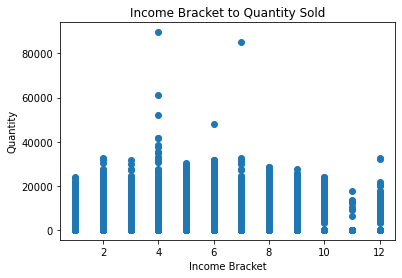

In [88]:
plt.scatter(x=Retail_Coupon_DF['income_bracket'][::-1], y=Retail_Coupon_DF['quantity'][::-1])
plt.title('Income Bracket to Quantity Sold')
plt.xlabel("Income Bracket")
plt.ylabel("Quantity")

Text(0, 0.5, 'Selling Price')

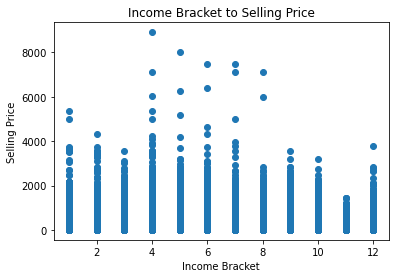

In [89]:
plt.scatter(x=Retail_Coupon_DF['income_bracket'], y=Retail_Coupon_DF['selling_price'])
plt.title('Income Bracket to Selling Price')
plt.xlabel("Income Bracket")
plt.ylabel("Selling Price")

Text(0.5, 1.0, 'Age Range to Quantity Sold')

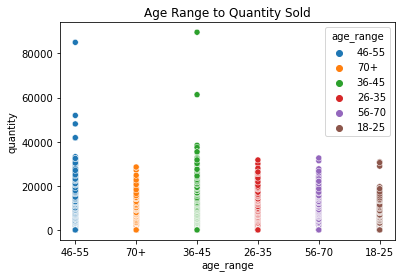

In [91]:
sns.scatterplot(data=Retail_Coupon_DF, x='age_range', y='quantity', hue='age_range')
plt.title('Age Range to Quantity Sold')

Text(0.5, 1.0, 'Age Range to Selling Price')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


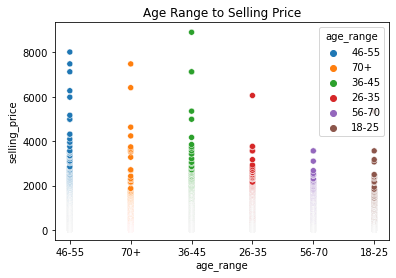

In [93]:
sns.scatterplot(data=Retail_Coupon_DF, x='age_range', y='selling_price', hue='age_range')
plt.title('Age Range to Selling Price')

Text(0.5, 1.0, 'Other Discount to Quantity sold')

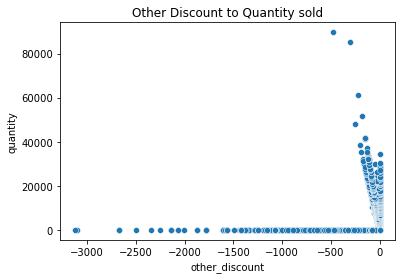

In [95]:
sns.scatterplot(data=Retail_Coupon_DF, x='other_discount', y='quantity')
plt.title('Other Discount to Quantity sold')

Text(0.5, 1.0, 'Marital Status to Quantity Sold')

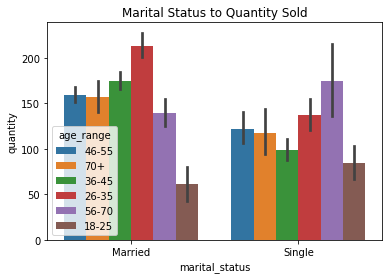

In [97]:
sns.barplot(x="marital_status", y="quantity", data =Retail_Coupon_DF, hue='age_range')
plt.title('Marital Status to Quantity Sold')

Text(0.5, 1.0, 'Marital status to Selling Price')

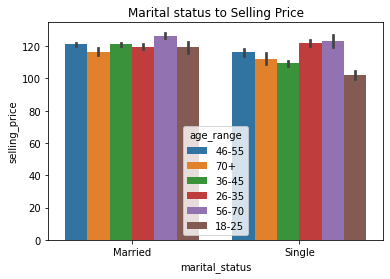

In [98]:
sns.barplot(x="marital_status", y="selling_price", data =Retail_Coupon_DF, hue='age_range')
plt.title('Marital status to Selling Price')

Text(0.5, 1.0, 'Selling Price to Quantity Sold')

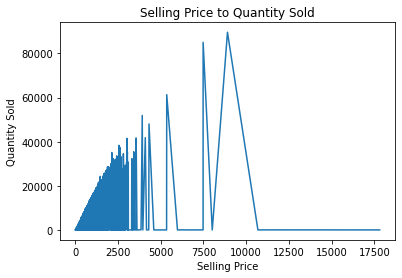

In [99]:
plt.plot(Retail_Coupon_DF['selling_price'], Retail_Coupon_DF['quantity'])
plt.xlabel("Selling Price")
plt.ylabel("Quantity Sold")
plt.title('Selling Price to Quantity Sold')

In [100]:
#Web Scraping

In [101]:
weather = requests.get('https://weather.com/en-IE/weather/today/l/Dublin+Dublin?canonicalCityId=8b67a061d0a7850987068b6d64151b26e08812f4e619ae29a2f2a75e8a53b871')

In [102]:
forecast = bs(weather.content, 'lxml')

In [103]:
temp = forecast.find("span", {'class': 'CurrentConditions--tempValue--3a50n'})

In [135]:
int(temp.text[:-1])

10